In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# curve_fit 线性拟合

In [3]:
x_data = np.linspace(-5, 5, num=50)
y_true = 2.9 * np.sin(1.5 * x_data)
y_data = y_true + np.random.normal(size=50)

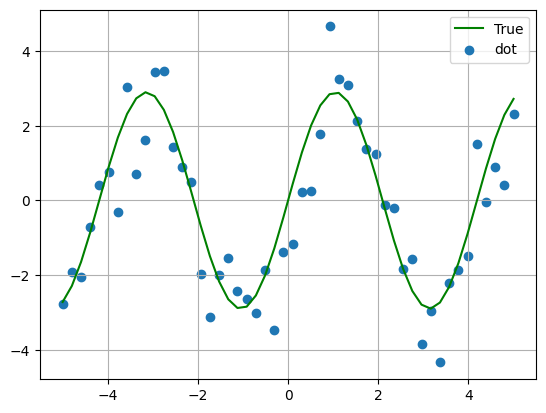

In [4]:
plt.plot(x_data, y_true, color="g", label="True")
plt.scatter(x_data, y_data, label="dot")
plt.legend()
plt.grid(True)

In [5]:
def test_func(x, a, b):
    return a * np.sin(b * x)

In [6]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
params, params_covariance

(array([2.80564478, 1.48216242]),
 array([[ 0.04174886, -0.00046949],
        [-0.00046949,  0.00054094]]))

In [7]:
y_pred = test_func(x_data, *params)
y_pred

array([-2.53461134, -2.06115555, -1.40054696, -0.61276878,  0.23064877,
        1.05312342,  1.77997452,  2.34520405,  2.69748917,  2.80484243,
        2.65751616,  2.26888757,  1.67424412,  0.9275794 ,  0.09669052,
       -0.74297785, -1.51518388, -2.14981129, -2.58923597, -2.79355816,
       -2.74422543, -2.44571719, -1.92513797, -1.22975632, -0.42271288,
        0.42271288,  1.22975632,  1.92513797,  2.44571719,  2.74422543,
        2.79355816,  2.58923597,  2.14981129,  1.51518388,  0.74297785,
       -0.09669052, -0.9275794 , -1.67424412, -2.26888757, -2.65751616,
       -2.80484243, -2.69748917, -2.34520405, -1.77997452, -1.05312342,
       -0.23064877,  0.61276878,  1.40054696,  2.06115555,  2.53461134])

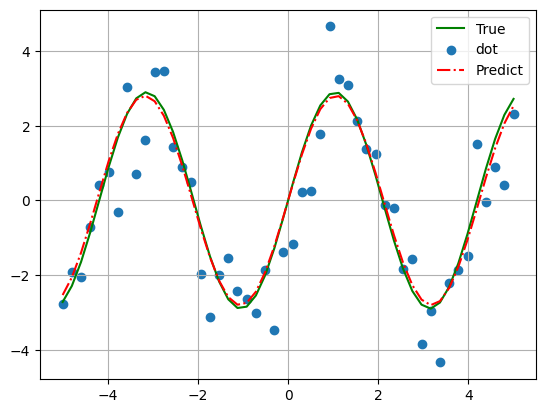

In [8]:
plt.plot(x_data, y_true, color="g", label="True")
plt.scatter(x_data, y_data, label="dot")
plt.plot(x_data, y_pred, color="r", linestyle="-.", label="Predict")
plt.legend()
plt.grid(True)

# minimize 标量函数的最小值

函数表示一条曲线，曲线有高点和低点。

高点称为最大值。

低点称为最小值。

整条曲线中的最高点称为全局最大值，其余部分称为局部最大值。

整条曲线的最低点称为全局最小值，其余的称为局部最小值。

可以使用 scipy.optimize.minimize() 函数来最小化函数。

minimize() 函接受以下几个参数：

    fun - 要优化的函数

    x0 - 初始猜测值

    method - 要使用的方法名称，值可以是：'CG'，'BFGS'，'Newton-CG'，'L-BFGS-B'，'TNC'，'COBYLA'，，'SLSQP'。

    callback - 每次优化迭代后调用的函数。

    options - 定义其他参数的字典：

    {
         "disp": boolean - print detailed description
         "gtol": number - the tolerance of the error
    }



In [23]:
def f(x):
    return x**2 + 10 * np.sin(x)

In [29]:
x = np.arange(-10, 10, 0.1)
y = f(x)

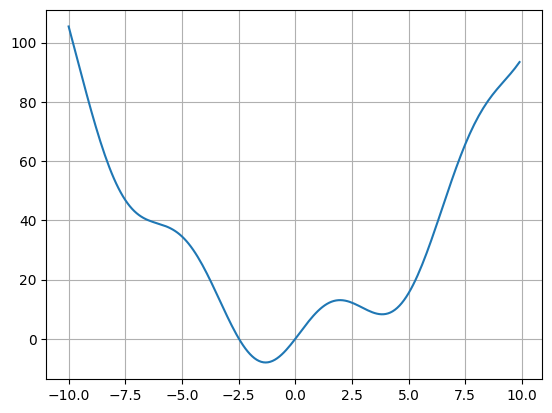

In [30]:
plt.plot(x, y)
plt.grid()

In [31]:
result = optimize.minimize(f, x0=0)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -7.945823375615215
        x: [-1.306e+00]
      nit: 5
      jac: [-1.192e-06]
 hess_inv: [[ 8.589e-02]]
     nfev: 12
     njev: 6

In [32]:
result.x

array([-1.30644012])

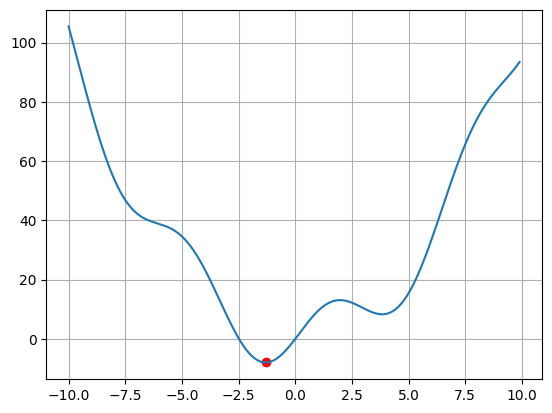

In [33]:
plt.plot(x, y)
plt.scatter(result.x, f(result.x), c="r")
plt.grid()

In [34]:
# 全局最小值：这种方法的一个可能问题是，如果函数具有局部最小值，算法可能会根据初始点 x0 找到这些局部最小值而不是全局最小值
result = optimize.minimize(f, x0=5)
result.x

array([3.83746712])

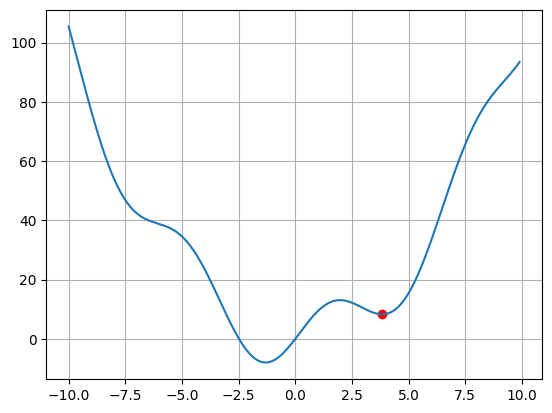

In [35]:
plt.plot(x, y)
plt.scatter(result.x, f(result.x), c="r")
plt.grid()

In [36]:
# 如果我们不知道全局最小值的邻域来选择初始点，我们需要求助于更复杂的全局优化。
# 为了找到全局最小值，我们使用scipy.optimize.basinhopping() ，它将局部优化器与起点采样相结合
# 但依然可能找不到最小值

In [37]:
result = optimize.basinhopping(f, x0=5)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 8.315585579477458
                          x: [ 3.837e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1110
                       njev: 555
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 8.315585579477458
                                    x: [ 3.837e+00]
                                  nit: 4
                                  jac: [ 1.192e-07]
                             hess_inv: [[ 1.188e-01]]
                                 nfev: 12
                                 njev: 6

In [38]:
result.x

array([3.83746709])

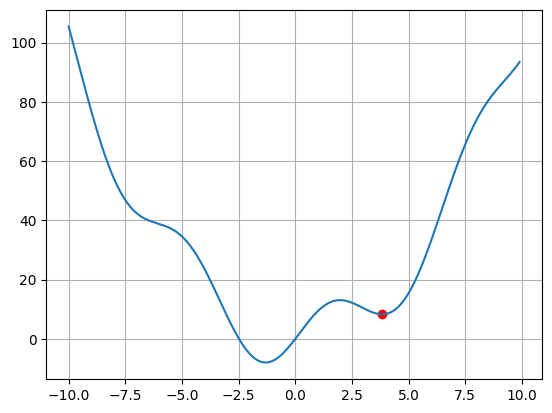

In [40]:
plt.plot(x, y)
plt.scatter(result.x, f(result.x), c="r")
plt.grid()

# root 寻找标量函数的根

SciPy 的 optimize 模块提供了常用的最优化算法函数实现，我们可以直接调用这些函数完成我们的优化问题，比如查找函数的最小值或方程的根等。

NumPy 能够找到多项式和线性方程的根，但它无法找到非线性方程的根，如下所示：

    x + cos(x)

因此我们可以使用 SciPy 的 optimze.root 函数，这个函数需要两个参数：

    fun - 表示方程的函数。
    x0 - 根的初始猜测。

该函数返回一个对象，其中包含有关解决方案的信息。

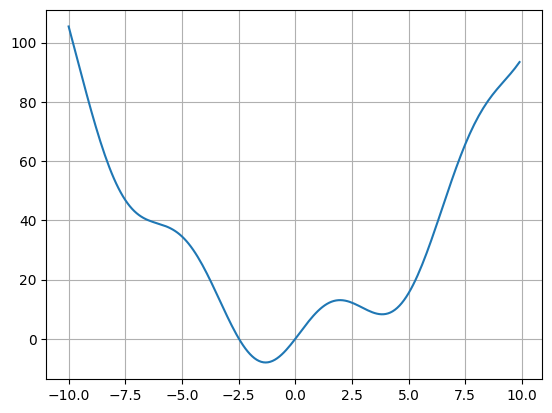

In [42]:
plt.plot(x, y)
plt.grid()

In [43]:
root1 = optimize.root(f, x0=1)
root1

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 0.000e+00]
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-1.000e+01]
     qtf: [ 1.333e-32]

In [44]:
root2 = optimize.root(f, x0=-2)
root2

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.616e-13]
       x: [-2.479e+00]
    nfev: 8
    fjac: [[-1.000e+00]]
       r: [ 1.285e+01]
     qtf: [ 4.934e-08]

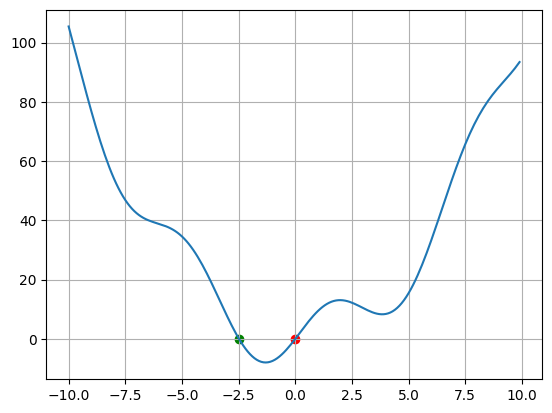

In [47]:
plt.plot(x, y)
plt.scatter(root1.x, f(root1.x), c="r")
plt.scatter(root2.x, f(root2.x), c="g")
plt.grid()